# Lab 1: Handwritten Digits Recognition

## Problem definition


We will provide a model to recognize handwritten digits.

## Data Preparation


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense

Loading the dataset

In [18]:
# downloading MNIST dataset
(x_train, y_train) , (x_test, y_test)= datasets.mnist.load_data() 

In [19]:
# print the size of the dataset
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape  )

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Snapshot of the dataset


In [20]:
import matplotlib.pyplot as plt

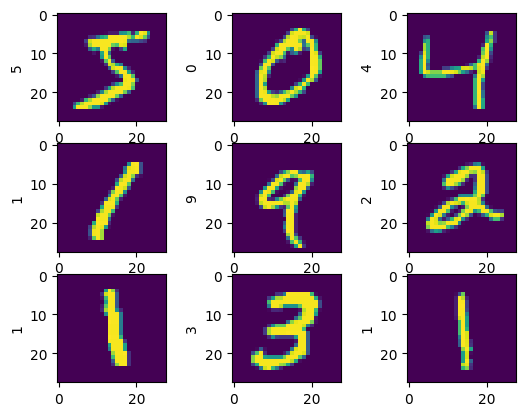

In [21]:
# show the first 9 images 
plt.figure()
for i in range(9):
  # creation of a figure containing 9 subplots
  plt.subplot(3,3,i+1)
  # show an image
  plt.imshow(x_train[i])
  # show the label
  plt.ylabel(y_train[i])
plt.show()

In [22]:
# print the first image
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Data Normalization

In [23]:
# reshaping the dataset
x_train_1 = x_train.reshape(60000,784)
x_test_1 = x_test.reshape(10000,784)

In [24]:
# pixel normalization
x_train_1 = x_train_1.astype('float32')/255
x_test_1 = x_test_1.astype('float32')/255

In [25]:
# showing the first normqlized picture
print(x_train_1[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [26]:
# shape of the x_train_1 and x_test_1
print(x_train_1.shape)
print(x_test_1.shape)

(60000, 784)
(10000, 784)


## CNN Construction

In [27]:
# one-hot encoding
y_train_1 = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_1 = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [28]:
#Creattion of the CNN model 

model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [29]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [30]:
# reshape the dataset
x_train_2 = x_train_1.reshape(60000,28,28,1)
x_test_2 = x_test_1.reshape(10000,28,28,1)

In [31]:
# train the model
model.fit(x_train_2, y_train_1, batch_size=128, epochs=10, validation_data=(x_test_2, y_test_1))

# evaluate the model
score = model.evaluate(x_test_2, y_test_1, verbose=0)

# print the test accuracy
print('Test accuracy:', score[1])

# print the test loss
print('Test loss:', score[0])

Epoch 1/10
  1/469 [..............................] - ETA: 2:42 - loss: 2.3111 - accuracy: 0.0703

2022-12-06 16:26:28.840464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.2303 - accuracy: 0.9297

2022-12-06 16:26:38.457625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 11s 22ms/step - loss: 0.2303 - accuracy: 0.9297 - val_loss: 0.0540 - val_accuracy: 0.9831
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0738 - accuracy: 0.9775 - val_loss: 0.0373 - val_accuracy: 0.9878
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0552 - accuracy: 0.9834 - val_loss: 0.0384 - val_accuracy: 0.9876
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0297 - val_accuracy: 0.9912
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0387 - accuracy: 0.9884 - val_loss: 0.0270 - val_accuracy: 0.9909
Epoch 6/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0273 - val_accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0265 - val_accuracy: 0.9920
Epo

In [32]:
# save the model

model.save('mnist_cnn.h5')

# load the model

from tensorflow.keras.models import load_model
model = load_model('mnist_cnn.h5')